In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist
import torch
import numpy as np
import argparse
import torch.nn as nn
import torch.utils.data as data_utils
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from skimage import filters
from PIL import Image
from scipy import ndimage , misc

Using TensorFlow backend.


### Load the cropped and resized set of images from the synthetic MNIST dataset

In [4]:
#Load the train and validation set obtained from the MNIST_preprocessing notebook
combined_rest_train_imgs=np.load('combined_rest_train_imgs_OG.npy')
combined_rest_train_labels=np.load('combined_rest_train_labels_OG.npy')
valid_modified_mnist=np.load('valid_modified_mnist.npy')
valid_labels_modified_mnist=np.load('valid_labels_modified_mnist.npy')
#Reshape 
combined_rest_train_imgs = combined_rest_train_imgs.reshape(123262,1,28,28)
combined_rest_train_labels = combined_rest_train_labels.reshape(123262,)


### Rotations

Rotate 10 degrees clockwise

C:\Users\coco_\miniconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


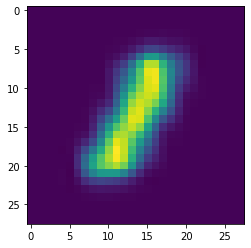

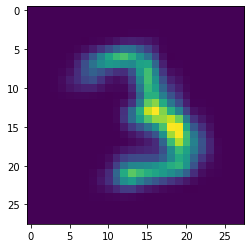

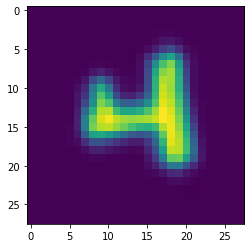

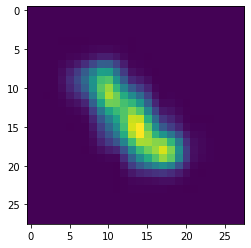

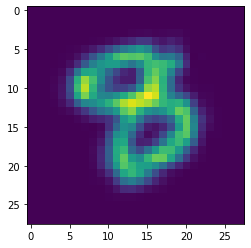

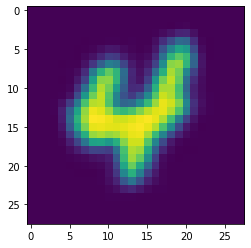

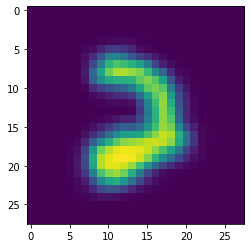

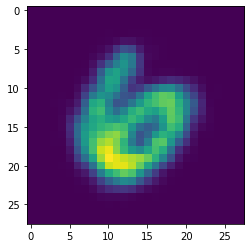

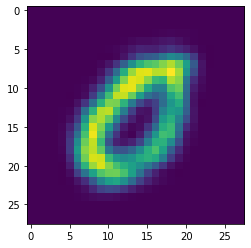

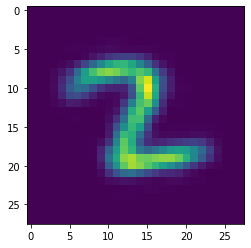

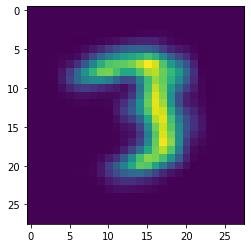

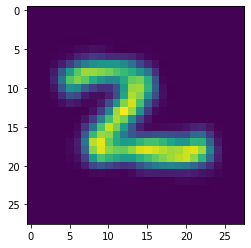

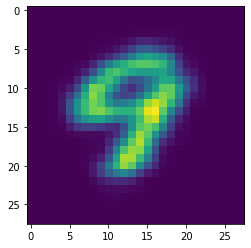

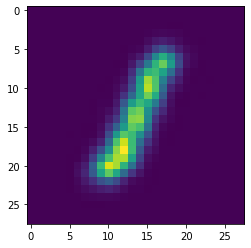

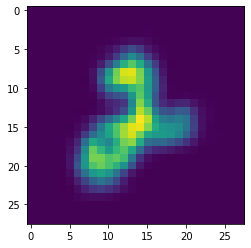

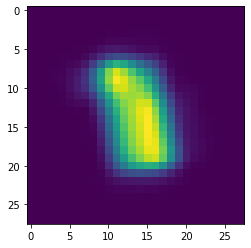

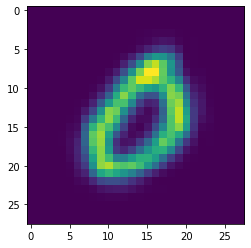

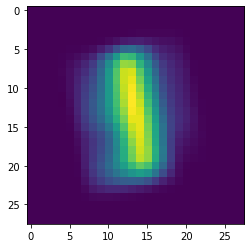

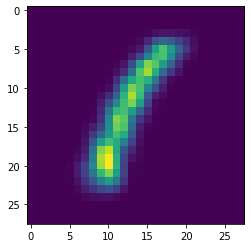

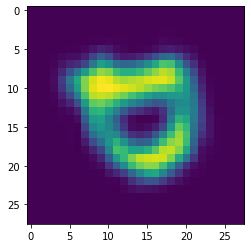

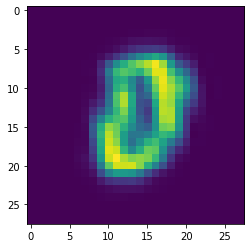

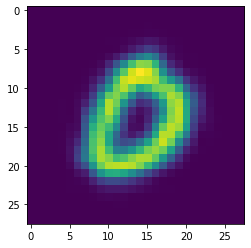

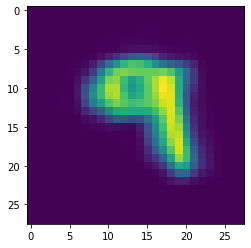

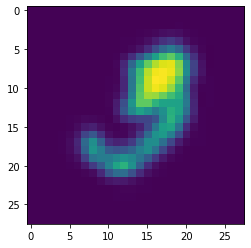

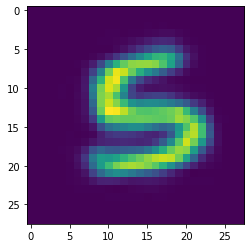

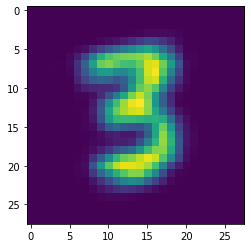

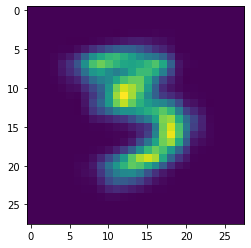

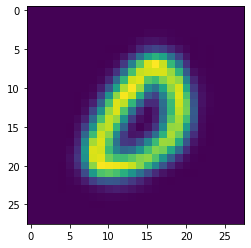

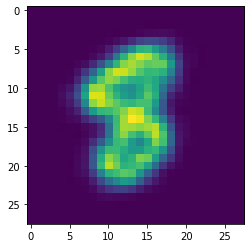

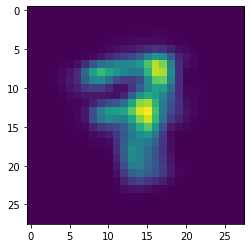

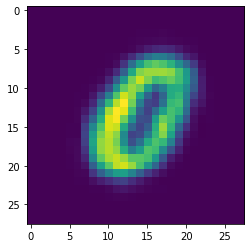

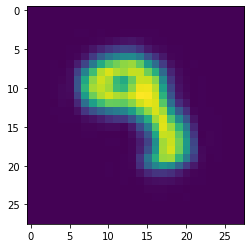

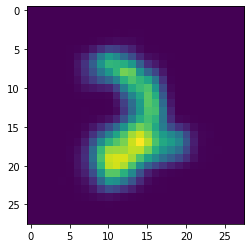

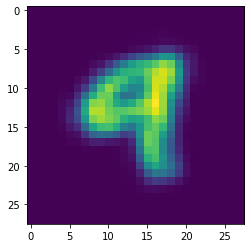

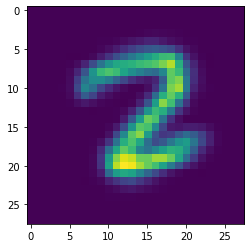

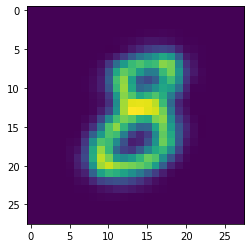

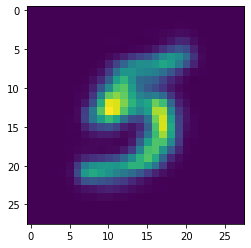

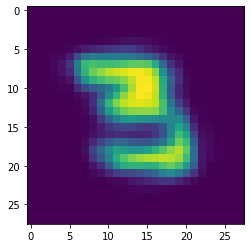

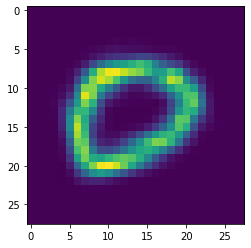

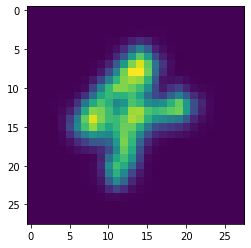

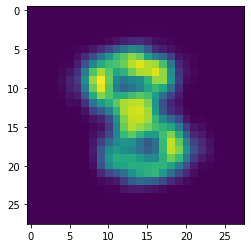

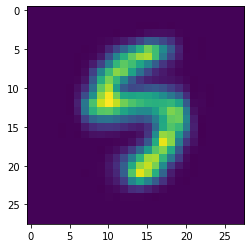

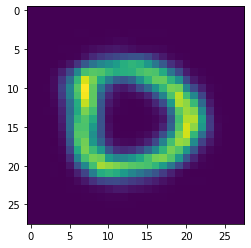

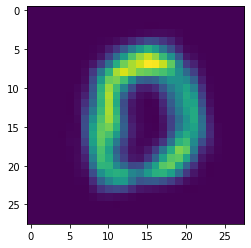

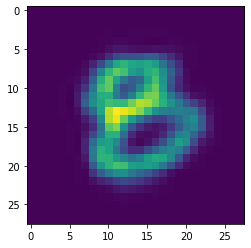

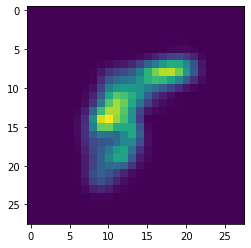

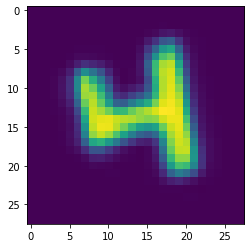

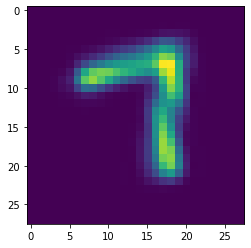

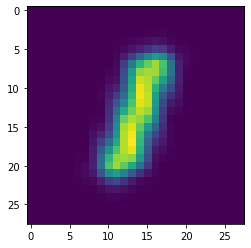

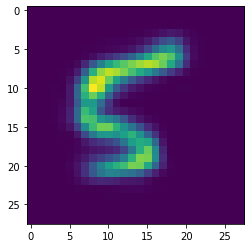

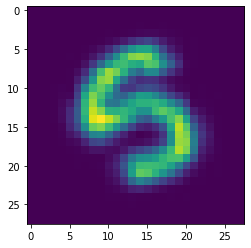

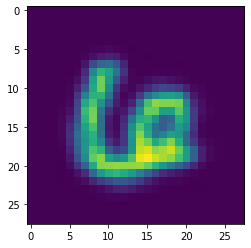

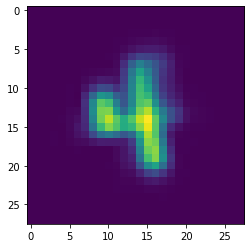

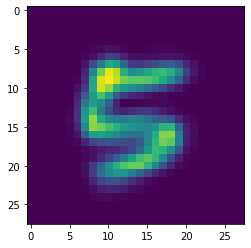

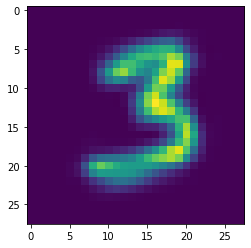

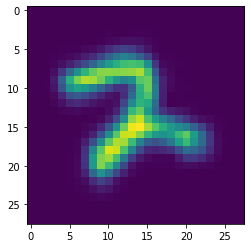

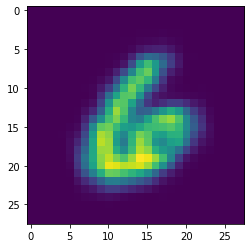

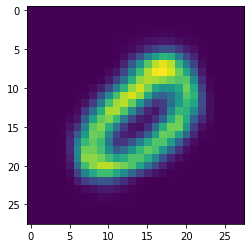

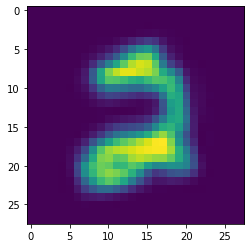

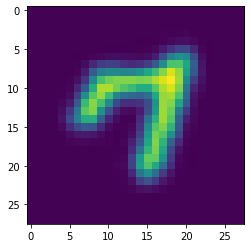

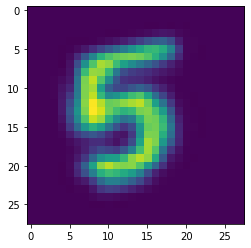

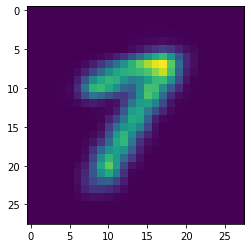

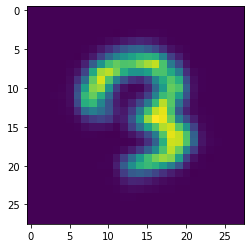

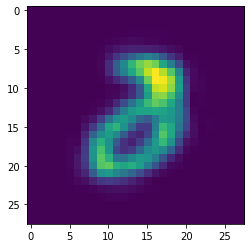

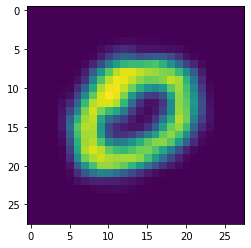

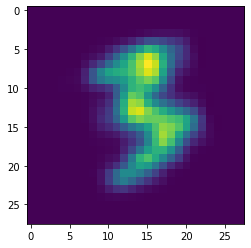

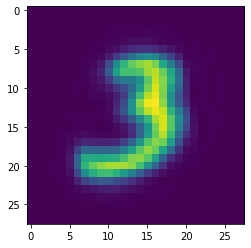

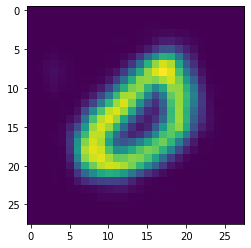

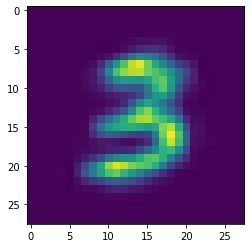

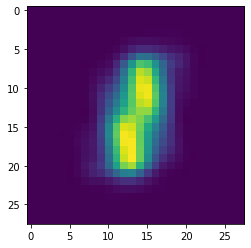

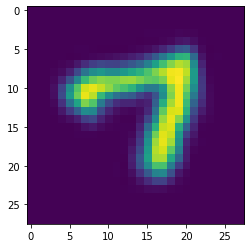

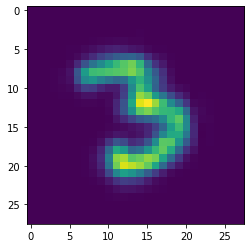

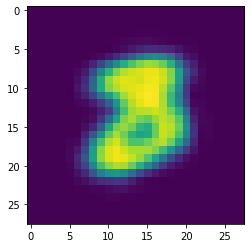

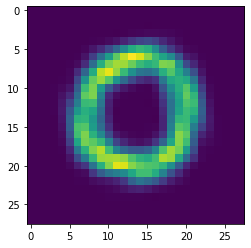

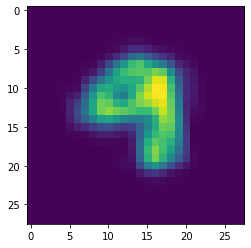

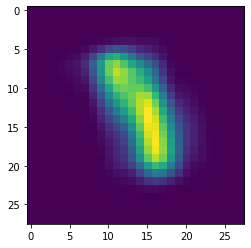

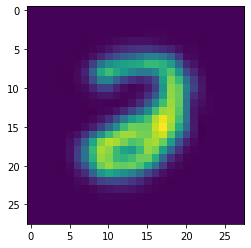

KeyboardInterrupt: 

In [5]:
#rotation angle in degree
rotated_pos_10= np.empty((1,28,28))

for i in range(len(combined_rest_train_imgs)):
    #Rotation 10 degrees
    rotate_img= ndimage.rotate(combined_rest_train_imgs[i,0,:,:].copy(), 10)
    rotate_img = misc.imresize(rotate_img,(28,28))#cv2.resize(rotate_img, (28,28), interpolation = cv2.INTER_AREA)
    plt.imshow(rotate_img)
    plt.show()
    rotate_img = rotate_img.reshape(1,28,28)
    rotated_pos_10 = np.concatenate((rotated_pos_10,rotate_img),axis=0)
    if i % 18326 == 18325:
        print('processed :',i,'images, pourcentage: ',i/len(combined_rest_train_imgs))
#rotated_pos_10 = np.delete(rotated_pos_10, (0), axis=0)
rotated_pos_10 = rotated_pos_10.reshape(183262,1,28,28)
#np.save('rotated_pos_10.npy',rotated_pos_10)

In [33]:
rotated_pos_10 = np.delete(rotated_pos_10, (0), axis=0)
rotated_pos_10 = rotated_pos_10.reshape(rotated_pos_10.shape[0],1,28,28)
#np.save('rotated_pos_10.npy',rotated_pos_10)

Rotate of 10 degrees counter-clockwise

In [5]:
rotated_neg_10 = np.empty((1,28,28))
for i in range(60000,len(combined_rest_train_imgs)):
    #Rotation -10 degrees
    rotate_img_neg_10= ndimage.rotate(combined_rest_train_imgs[i,0,:,:].copy(), -10)
    rotate_img_neg_10 = cv2.resize(rotate_img_neg_10, (28,28), interpolation = cv2.INTER_AREA)
    rotate_img_neg_10 = rotate_img_neg_10.reshape(1,28,28)
    rotated_neg_10 = np.concatenate((rotated_neg_10,rotate_img_neg_10),axis=0)
    if i % 18326 == 18325:        
        print('processed :',i,'images, pourcentage: ',i/len(combined_rest_train_imgs))
        np.save('rotate_img_neg_10.npy',rotate_img_neg_10)
rotate_img_neg_10 = np.delete(rotate_img_neg_10, (0), axis=0)
rotate_img_neg_10 = rotate_img_neg_10.reshape(183262,1,28,28)
#np.save('rotate_img_neg_10.npy',rotate_img_neg_10)

processed : 73303 images, pourcentage:  0.3999901779965296
processed : 91629 images, pourcentage:  0.4999890866628106
processed : 109955 images, pourcentage:  0.5999879953290916
processed : 128281 images, pourcentage:  0.6999869039953728


KeyboardInterrupt: 

### Translation

Right translation

In [10]:
trans_right_pos= np.empty((1,28,28))

for im in range(60000,len(combined_rest_train_imgs)):
    img = combined_rest_train_imgs[im,0,:,:].copy()
    for j in range(28):
        for i in range(28):
            if (i < 28-5):
                img[j][i] = img[j][i+4]
    img = img.reshape(1,28,28)
    trans_right_pos = np.concatenate((trans_right_pos,img),axis=0)
    if im % 18326 == 18325:    
        print('processed :',im,'images, pourcentage: ',im/len(combined_rest_train_imgs))
trans_right_pos = np.delete(trans_right_pos, (0), axis=0)
trans_right_pos = trans_right_pos.reshape(trans_right_pos.shape[0],1,28,28)
#np.save('trans_right_pos.npy',trans_right_pos)
                

processed : 73303 images, pourcentage:  0.3999901779965296
processed : 91629 images, pourcentage:  0.4999890866628106
processed : 109955 images, pourcentage:  0.5999879953290916
processed : 128281 images, pourcentage:  0.6999869039953728


KeyboardInterrupt: 

Left translation

In [ ]:
trans_left_pos= np.empty((1,28,28))

for im in range(60000,len(combined_rest_train_imgs)):
    img = combined_rest_train_imgs[im,0,:,:].copy()
    for i in range(28, 1, -1):
        for j in range(28):
            if (i < 28-3):
                img[j][i] = img[j][i-4]
            elif (i < 28-1):
                img[j][i] = 0
    img = img.reshape(1,28,28)
    trans_left_pos = np.concatenate((trans_left_pos,img),axis=0)
    if im % 18326 == 18325:    
        print('processed :',im,'images, pourcentage: ',im/len(combined_rest_train_imgs))
trans_left_pos = np.delete(trans_left_pos, (0), axis=0)
trans_left_pos = trans_left_pos.reshape(trans_left_pos.shape[0],1,28,28)
#np.save('trans_left_pos.npy',trans_left_pos)

Up translation

In [ ]:
trans_up_pos= np.empty((1,28,28))
for im in range(60000,len(combined_rest_train_imgs)):
    img = combined_rest_train_imgs[im,0,:,:].copy()
    for j in range(28):
           for i in range(28):
                if (j < 28 - 4 and j > 0):
                      img[j][i] = img[j+4][i]
                else:
                      img[j][i] = 0
    img = img.reshape(1,28,28)
    plt.imshow(img.squeeze())
    plt.show()
    trans_up_pos = np.concatenate((trans_up_pos,img),axis=0)
    if im % 18326 == 18325:    
        print('processed :',im.'images, pourcentage: ',im/len(combined_rest_train_imgs))
trans_up_pos = np.delete(trans_up_pos, (0), axis=0)
trans_up_pos = trans_up_pos.reshape(trans_up_pos.shape[0],1,28,28)
#np.save('trans_up_pos.npy',trans_up_pos)

### Making the labels set for each augmented dataset

In [7]:
rotated_pos_10 = np.load('rotated_pos_10.npy')
rotated_neg_10 = np.load('rotated_neg_10.npy')
trans_right_pos = np.load('trans_right_pos.npy')
trans_left_pos = np.load('trans_left_pos.npy')
trans_up_pos = np.load('trans_up_pos.npy')
print(rotated_pos_10.shape,rotated_neg_10.shape,trans_right_pos.shape,trans_left_pos.shape,trans_up_pos.shape)

(85517, 1, 28, 28) (79826, 1, 28, 28) (63262, 1, 28, 28) (63262, 1, 28, 28) (73262, 1, 28, 28)


In [21]:
#make the labels for te positively rotated
rotated_pos_10_labels = combined_rest_train_labels[:rotated_pos_10.shape[0]]
#np.save('rotated_pos_10_labels.npy',rotated_pos_10_labels)

In [23]:
#make the labels for te negatively rotated
rotated_neg_10_labels = combined_rest_train_labels[:rotated_neg_10.shape[0]]
#np.save('rotated_neg_10_labels.npy',rotated_neg_10_labels)

In [36]:
#make labels for the right translated
trans_right_pos_labels = combined_rest_train_labels[60000:]
#np.save('trans_right_pos_labels.npy',trans_right_pos_labels)


(63262,)


In [37]:
#make labels for the left translated
trans_left_pos_labels = combined_rest_train_labels[60000:]
#np.save('trans_left_pos_labels.npy',trans_left_pos_labels)

In [8]:
#make labels for the up translated
trans_up_pos_labels = combined_rest_train_labels[50000:]
#np.save('trans_up_pos_labels.npy',trans_up_pos_labels)